## Importar librerías

In [31]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

## Importar funciones personalizadas

In [32]:
%run pandas-missing-extension.py

## Cargar los datos de NHANES

In [33]:
nhanes_raw_df= (
    nhanes.load.load_NHANES_data(year="2017-2018")
    .clean_names(case_type = "snake")
)

nhanes_raw_df.shape

(8366, 197)

## Procesar los datos de NHANES

In [34]:
import numpy as np

nhanes_df = (
    nhanes_raw_df
    .select_columns(
        "general_health_condition",
        "age_in_years_at_screening",
        "gender",
        "current_selfreported_height_inches",
        "current_selfreported_weight_pounds",
        "doctor_told_you_have_diabetes",
        "60_sec_pulse30_sec_pulse2",
        "total_cholesterol_mgdl"
    )
    .rename_columns({
        "age_in_years_at_screening": "age",
        "current_selfreported_height_inches": "height",
        "current_selfreported_weight_pounds": "peso",
        "doctor_told_you_have_diabetes": "diabetes",
        "60_sec_pulse30_sec_pulse2": "pulso",
        "total_cholesterol_mgdl": "total_cholesterol"
    })
    .replace({
        "height": {9999: np.nan, 7777: np.nan},
        "peso": {9999: np.nan, 7777: np.nan},
        "diabetes": {"Borderline": np.nan}
    })
    .missing.sort_variables_by_missingness()
    .dropna(
        subset = ["diabetes"],
        how = "any"
    )
    .transform_column(
        column_name = "diabetes",
        function = lambda s: s.astype(int),
        elementwise = False
    )
)


c:\Users\Admin\Documents\manejo_datos\Data-Handling-Course\venv\Lib\site-packages\pandas_flavor\register.py:164: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)
c:\Users\Admin\Documents\manejo_datos\Data-Handling-Course\venv\Lib\site-packages\pandas_flavor\register.py:164: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


## Visualizar los valores faltantes

<Axes: >

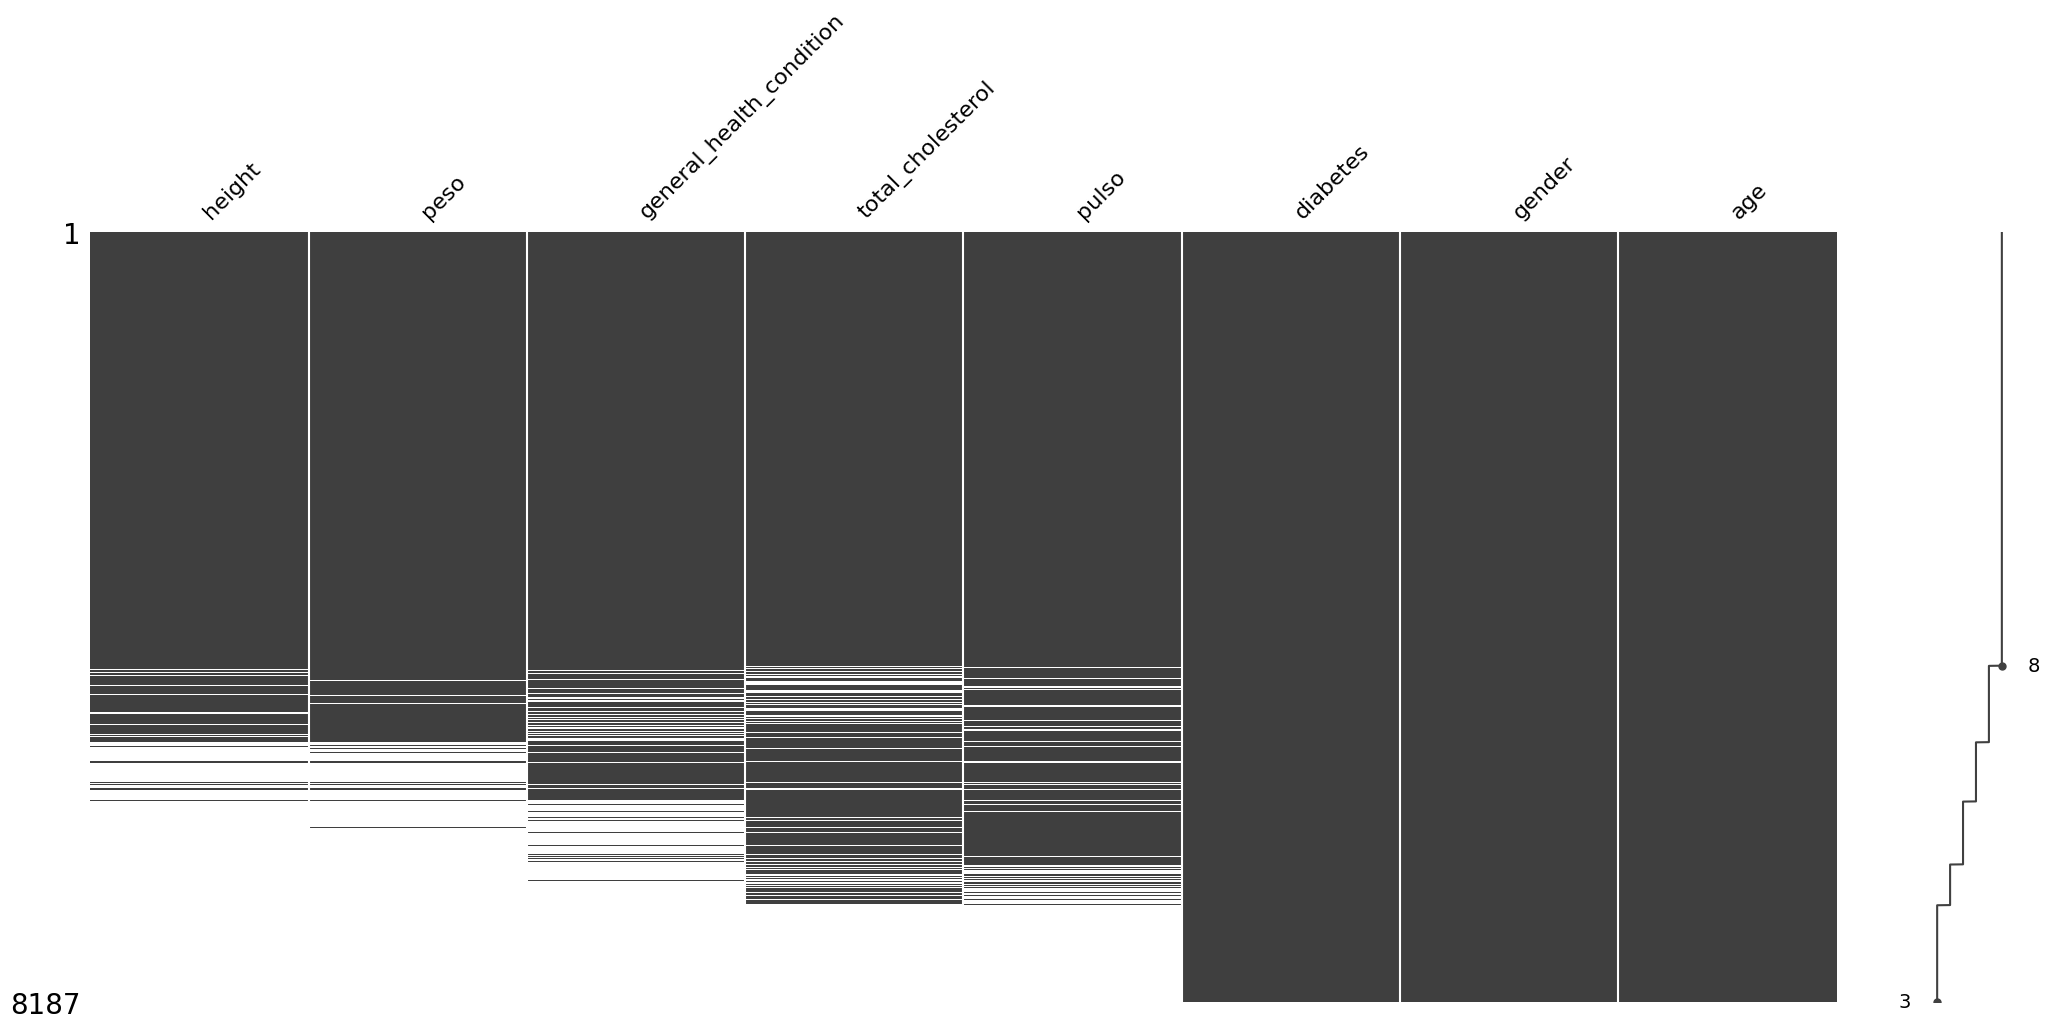

In [35]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort = "descending")
)


Analizando el gráfico, nos damos cuenta que hay variables que no tienen valores faltantes, osea que hay valores qu aparecen conjuntamente y son faltantes

c:\Users\Admin\Documents\manejo_datos\Data-Handling-Course\venv\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
c:\Users\Admin\Documents\manejo_datos\Data-Handling-Course\venv\Lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interm

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

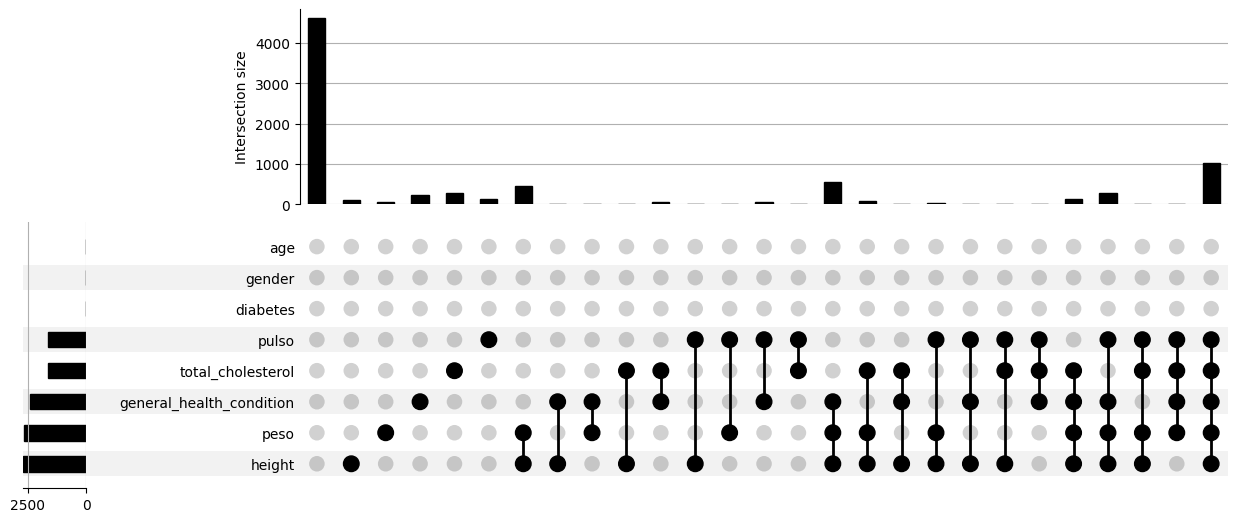

In [36]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot()
)

Reviando la relación de los valores faltantes, podriamos imputarlo o eliminarlo

In [29]:
nhanes_df

<Axes: >

<Axes: >

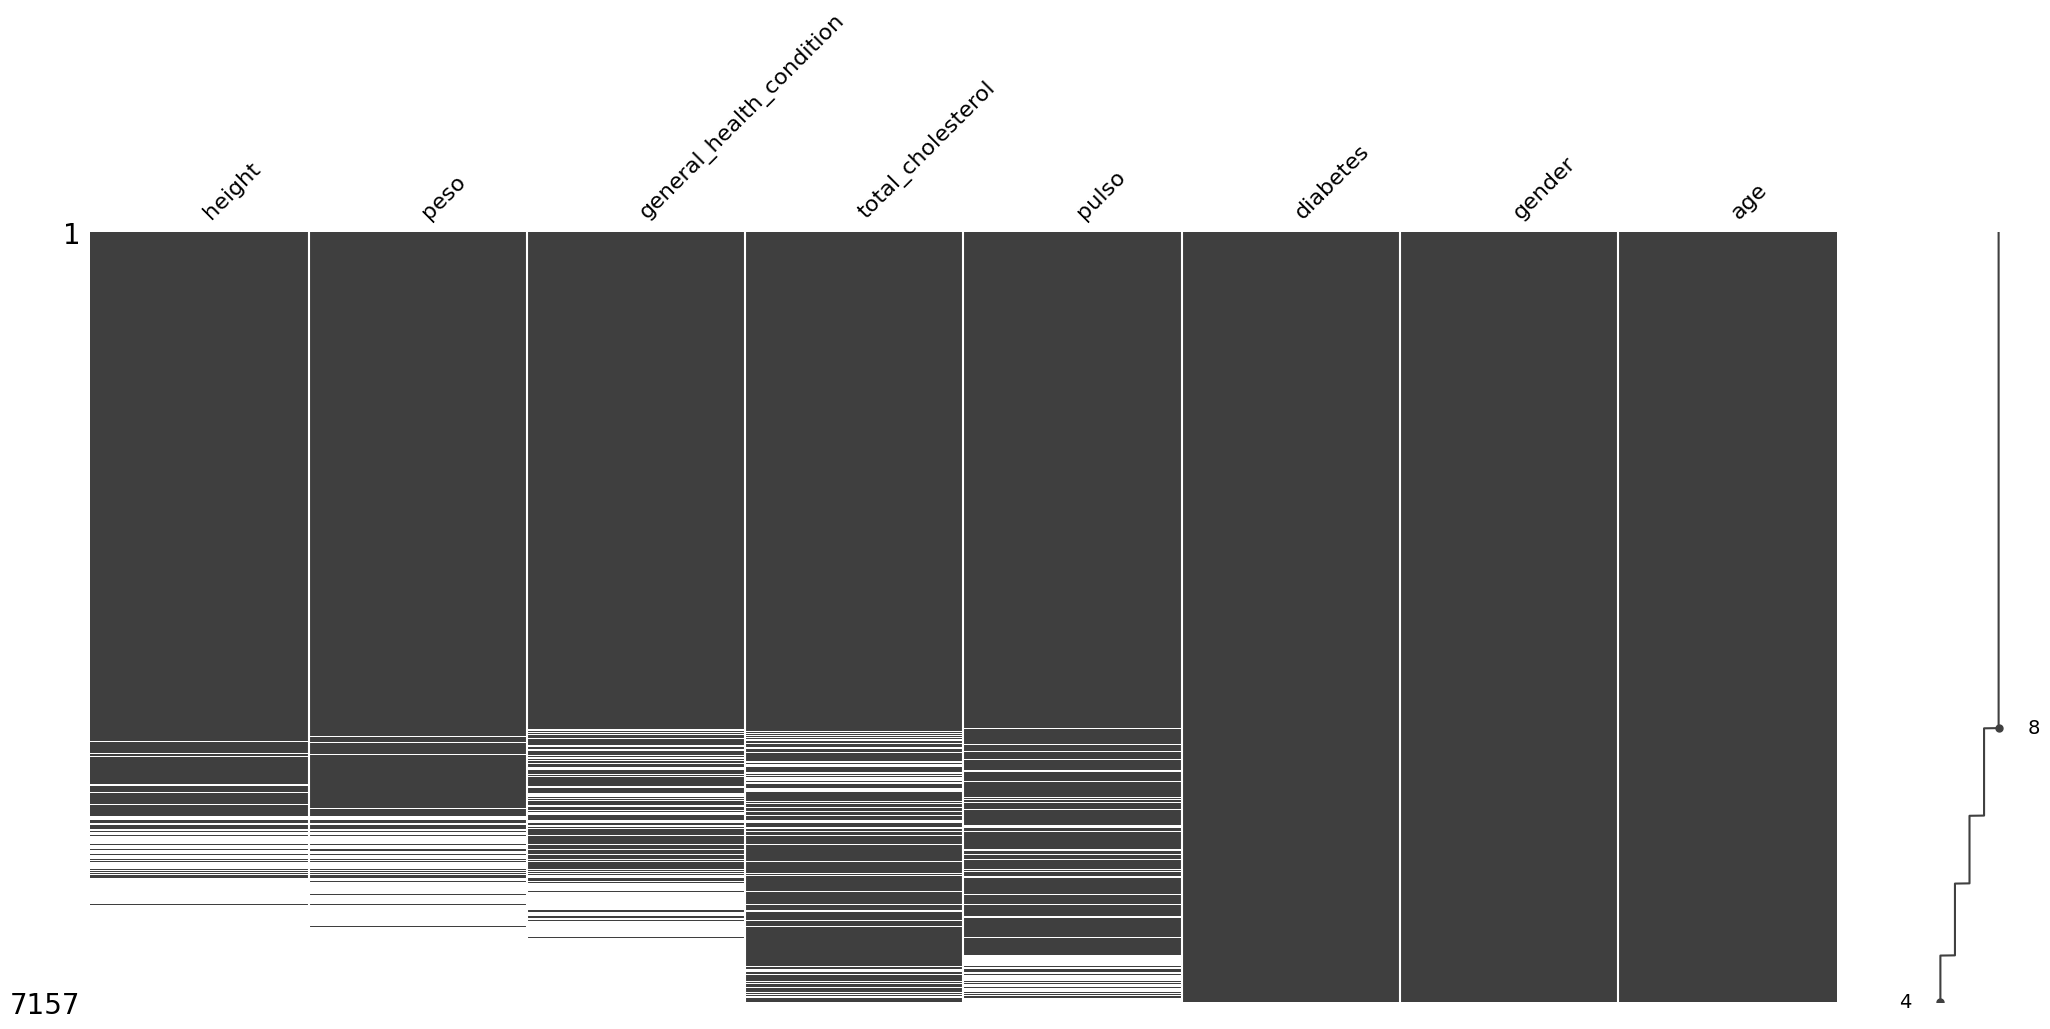

In [ ]:
# Aplica dropna pero sin sobrescribir con Axes
nhanes_df = (
    nhanes_df
    .dropna(  # Eliminamos las filas que tengan TODOS esos datos faltantes en las columnas
        subset=["pulso", "total_cholesterol", "general_health_condition", "peso", "height"], 
        how="all"
    )
)

# Aplica el método personalizado .missing
nhanes_df = nhanes_df.missing.sort_variables_by_missingness()

# Luego visualiza, pero sin sobrescribir nhanes_df
missingno.matrix(nhanes_df, sort="descending")


## Eliminar valores faltantes

In [38]:
nhanes_df.shape

(7157, 8)